Import Statements for json, numpy, and pandas

In [1]:
import pandas as pd
import numpy as np
import json
from IPython.display import Markdown, display
import matplotlib.pyplot as plt

Open each json file and convert to pandas DataFrame

In [2]:
with open('./fabindia/fab_women_rgb.json') as fw:
    fw_data = json.load(fw)
pfw = pd.DataFrame(fw_data)
with open('./fabindia/fab_men_rgb.json') as fm:
    fm_data = json.load(fm)
pfm = pd.DataFrame(fm_data)
with open('./fabindia/fab_kids_rgb.json') as fk:
    fk_data = json.load(fk)
pfk = pd.DataFrame(fk_data)

with open('./biba/biba_rgb.json') as biba:
    biba_data = json.load(biba)
pbiba = pd.DataFrame(biba_data)

with open('./global_desi/global_girls_rgb.json') as gg:
    gg_data = json.load(gg)
pgg = pd.DataFrame(gg_data)
with open('./global_desi/global_women_rgb.json') as gw:
    gw_data = json.load(gw) 
pgw = pd.DataFrame(gw_data)

pmasterfab = pd.concat([pfw, pfm, pfk], ignore_index=True)
pmastergd = pd.concat([pgg, pgw], ignore_index=True)

pmaster = pd.concat([pmasterfab, pbiba, pmastergd], ignore_index=True)

pwomen = pd.concat([pfw, pgw, pbiba], ignore_index=True)
pkids = pd.concat([pfk, pgg], ignore_index=True)

In [3]:
pmaster.head()

,image,name,price,index,average_rgb
0,https://apisap.fabindia.com/medias/2125359001-...,Metal Jhumka Earrings,61.5,0,NaN
1,https://apisap.fabindia.com/medias/20205294-01...,Pink Cotton Silk Embroidered Stole,46.0,1,"[182, 123, 112]"
2,https://apisap.fabindia.com/medias/20209437-01...,Green Cotton Printed Long Kurta,92.0,2,"[207, 155, 135]"
3,https://apisap.fabindia.com/medias/20191625-01...,Green Cotton Silk Printed Short Kurta,70.5,3,"[187, 135, 107]"
4,https://apisap.fabindia.com/medias/20173020-01...,Grey Cotton Silk Hand Block Printed Short Kurta,58.5,4,"[213, 171, 158]"


In [4]:
def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb

pmaster.info()
pmaster.describe()
pmaster['average_rgb']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   image        982 non-null    object 
 1   name         982 non-null    object 
 2   price        982 non-null    float64
 3   index        982 non-null    int64  
 4   average_rgb  763 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 38.5+ KB


0                  NaN
1      [182, 123, 112]
2      [207, 155, 135]
3      [187, 135, 107]
4      [213, 171, 158]
            ...       
977                NaN
978                NaN
979                NaN
980                NaN
981                NaN
Name: average_rgb, Length: 982, dtype: object

In [5]:
pmaster = pmaster.dropna(subset=['average_rgb'])

pmaster['average_rgb'] = pmaster['average_rgb'].apply(lambda x: tuple(x))

pmaster['average_hex'] = pmaster['average_rgb'].apply(rgb_to_hex)

In [6]:
pmaster['average_rgb']
pmaster['average_hex']

1      #b67b70
2      #cf9b87
3      #bb876b
4      #d5ab9e
5      #d09f8e
        ...   
968    #c79b85
969    #cb9677
970    #d2a187
971    #dea68c
972    #b88875
Name: average_hex, Length: 763, dtype: object

In [7]:
for i in range(len(pmaster)):
    brightness =  0.2126 * pmaster.iloc[i]['average_rgb'][0] + 0.5152 * pmaster.iloc[i]['average_rgb'][1] + 0.2722 * pmaster.iloc[i]['average_rgb'][2]
    pmaster.at[i, 'brightness'] = brightness

pmaster = pmaster.dropna(subset=['brightness'])
pmaster.head()

,image,name,price,index,average_rgb,average_hex,brightness
1,https://apisap.fabindia.com/medias/20205294-01...,Pink Cotton Silk Embroidered Stole,46.0,1.0,"(182, 123, 112)",#b67b70,160.6112
2,https://apisap.fabindia.com/medias/20209437-01...,Green Cotton Printed Long Kurta,92.0,2.0,"(207, 155, 135)",#cf9b87,138.4336
3,https://apisap.fabindia.com/medias/20191625-01...,Green Cotton Silk Printed Short Kurta,70.5,3.0,"(187, 135, 107)",#bb876b,176.3906
4,https://apisap.fabindia.com/medias/20173020-01...,Grey Cotton Silk Hand Block Printed Short Kurta,58.5,4.0,"(213, 171, 158)",#d5ab9e,164.7900
5,https://apisap.fabindia.com/medias/20191606-01...,Red Cotton Woven Long Kurta,49.0,5.0,"(208, 159, 142)",#d09f8e,166.8800


In [8]:
pmaster = pmaster.sort_values(by='brightness', ascending=False)
pmaster.head()
pmaster.tail()


,image,name,price,index,average_rgb,average_hex,brightness
185,https://apisap.fabindia.com/medias/20174840-01...,Natural Cotton Full Length Drawstring Pant,31.0,57.0,"(128, 73, 57)",#804939,53.2714
163,https://apisap.fabindia.com/medias/20164378-01...,Black Cotton Jamdani Choti Buti Regular Shirt,77.0,35.0,"(201, 152, 139)",#c9988b,49.6136
174,https://apisap.fabindia.com/medias/20183577-01...,Multi Cotton Printed Short Kurta,46.0,46.0,"(164, 112, 85)",#a47055,47.4548
113,https://apisap.fabindia.com/medias/20173087-01...,Teal Cotton Ajrakh Printed Knee Length Kurta,58.5,113.0,"(227, 191, 170)",#e3bfaa,47.4244
199,https://apisap.fabindia.com/medias/20164585-01...,Orange Cotton Striped Regular Shirt,40.0,71.0,"(154, 125, 117)",#9a7d75,43.6200


In [9]:
pmaster = pmaster.sort_values(by='brightness', ascending=True)
pmaster = pmaster.dropna(subset=['average_hex'])

display(Markdown('<br>'.join(
    f'<span style="font-family: monospace">{color} <span style="color: {color}">████████</span></span>'
    for color in pmaster['average_hex']
)))

display(Markdown('<br>'.join(
    f'<span style="font-family: monospace">{color} <span style="color: {color}">████████</span></span>'
    for color in pmaster['average_hex'].tail(10)
)))


<span style="font-family: monospace">#9a7d75 <span style="color: #9a7d75">████████</span></span><br><span style="font-family: monospace">#e3bfaa <span style="color: #e3bfaa">████████</span></span><br><span style="font-family: monospace">#a47055 <span style="color: #a47055">████████</span></span><br><span style="font-family: monospace">#c9988b <span style="color: #c9988b">████████</span></span><br><span style="font-family: monospace">#804939 <span style="color: #804939">████████</span></span><br><span style="font-family: monospace">#8b7065 <span style="color: #8b7065">████████</span></span><br><span style="font-family: monospace">#d5846b <span style="color: #d5846b">████████</span></span><br><span style="font-family: monospace">#a48663 <span style="color: #a48663">████████</span></span><br><span style="font-family: monospace">#a15541 <span style="color: #a15541">████████</span></span><br><span style="font-family: monospace">#ead1b2 <span style="color: #ead1b2">████████</span></span><br><span style="font-family: monospace">#695544 <span style="color: #695544">████████</span></span><br><span style="font-family: monospace">#ae9674 <span style="color: #ae9674">████████</span></span><br><span style="font-family: monospace">#773f2b <span style="color: #773f2b">████████</span></span><br><span style="font-family: monospace">#ee9d27 <span style="color: #ee9d27">████████</span></span><br><span style="font-family: monospace">#795c51 <span style="color: #795c51">████████</span></span><br><span style="font-family: monospace">#e9cda7 <span style="color: #e9cda7">████████</span></span><br><span style="font-family: monospace">#c5b094 <span style="color: #c5b094">████████</span></span><br><span style="font-family: monospace">#82634f <span style="color: #82634f">████████</span></span><br><span style="font-family: monospace">#ba8152 <span style="color: #ba8152">████████</span></span><br><span style="font-family: monospace">#c99a85 <span style="color: #c99a85">████████</span></span><br><span style="font-family: monospace">#bf8867 <span style="color: #bf8867">████████</span></span><br><span style="font-family: monospace">#ac6c55 <span style="color: #ac6c55">████████</span></span><br><span style="font-family: monospace">#b7866a <span style="color: #b7866a">████████</span></span><br><span style="font-family: monospace">#995f4f <span style="color: #995f4f">████████</span></span><br><span style="font-family: monospace">#792d27 <span style="color: #792d27">████████</span></span><br><span style="font-family: monospace">#8e493f <span style="color: #8e493f">████████</span></span><br><span style="font-family: monospace">#764e40 <span style="color: #764e40">████████</span></span><br><span style="font-family: monospace">#d8b4a2 <span style="color: #d8b4a2">████████</span></span><br><span style="font-family: monospace">#755e58 <span style="color: #755e58">████████</span></span><br><span style="font-family: monospace">#863d2f <span style="color: #863d2f">████████</span></span><br><span style="font-family: monospace">#dab7a3 <span style="color: #dab7a3">████████</span></span><br><span style="font-family: monospace">#6a5849 <span style="color: #6a5849">████████</span></span><br><span style="font-family: monospace">#a96c51 <span style="color: #a96c51">████████</span></span><br><span style="font-family: monospace">#955846 <span style="color: #955846">████████</span></span><br><span style="font-family: monospace">#ba7150 <span style="color: #ba7150">████████</span></span><br><span style="font-family: monospace">#c8b490 <span style="color: #c8b490">████████</span></span><br><span style="font-family: monospace">#a56e5e <span style="color: #a56e5e">████████</span></span><br><span style="font-family: monospace">#78554d <span style="color: #78554d">████████</span></span><br><span style="font-family: monospace">#685448 <span style="color: #685448">████████</span></span><br><span style="font-family: monospace">#815d3f <span style="color: #815d3f">████████</span></span><br><span style="font-family: monospace">#9f8d75 <span style="color: #9f8d75">████████</span></span><br><span style="font-family: monospace">#e5cda8 <span style="color: #e5cda8">████████</span></span><br><span style="font-family: monospace">#cc8279 <span style="color: #cc8279">████████</span></span><br><span style="font-family: monospace">#e6ceaa <span style="color: #e6ceaa">████████</span></span><br><span style="font-family: monospace">#8b5443 <span style="color: #8b5443">████████</span></span><br><span style="font-family: monospace">#e4a3a4 <span style="color: #e4a3a4">████████</span></span><br><span style="font-family: monospace">#886455 <span style="color: #886455">████████</span></span><br><span style="font-family: monospace">#b87943 <span style="color: #b87943">████████</span></span><br><span style="font-family: monospace">#bc7c5f <span style="color: #bc7c5f">████████</span></span><br><span style="font-family: monospace">#7e5f57 <span style="color: #7e5f57">████████</span></span><br><span style="font-family: monospace">#c8796f <span style="color: #c8796f">████████</span></span><br><span style="font-family: monospace">#bd8b72 <span style="color: #bd8b72">████████</span></span><br><span style="font-family: monospace">#cea588 <span style="color: #cea588">████████</span></span><br><span style="font-family: monospace">#eaae44 <span style="color: #eaae44">████████</span></span><br><span style="font-family: monospace">#835a20 <span style="color: #835a20">████████</span></span><br><span style="font-family: monospace">#b67b61 <span style="color: #b67b61">████████</span></span><br><span style="font-family: monospace">#b47152 <span style="color: #b47152">████████</span></span><br><span style="font-family: monospace">#a78e62 <span style="color: #a78e62">████████</span></span><br><span style="font-family: monospace">#836c64 <span style="color: #836c64">████████</span></span><br><span style="font-family: monospace">#836c64 <span style="color: #836c64">████████</span></span><br><span style="font-family: monospace">#7a4233 <span style="color: #7a4233">████████</span></span><br><span style="font-family: monospace">#9d7d65 <span style="color: #9d7d65">████████</span></span><br><span style="font-family: monospace">#6a5751 <span style="color: #6a5751">████████</span></span><br><span style="font-family: monospace">#e4b1a6 <span style="color: #e4b1a6">████████</span></span><br><span style="font-family: monospace">#be947b <span style="color: #be947b">████████</span></span><br><span style="font-family: monospace">#865c3b <span style="color: #865c3b">████████</span></span><br><span style="font-family: monospace">#b27b62 <span style="color: #b27b62">████████</span></span><br><span style="font-family: monospace">#9f8375 <span style="color: #9f8375">████████</span></span><br><span style="font-family: monospace">#d8af8f <span style="color: #d8af8f">████████</span></span><br><span style="font-family: monospace">#e9a39f <span style="color: #e9a39f">████████</span></span><br><span style="font-family: monospace">#a36751 <span style="color: #a36751">████████</span></span><br><span style="font-family: monospace">#ba9381 <span style="color: #ba9381">████████</span></span><br><span style="font-family: monospace">#5e4a3d <span style="color: #5e4a3d">████████</span></span><br><span style="font-family: monospace">#cf9b88 <span style="color: #cf9b88">████████</span></span><br><span style="font-family: monospace">#655541 <span style="color: #655541">████████</span></span><br><span style="font-family: monospace">#f6b99d <span style="color: #f6b99d">████████</span></span><br><span style="font-family: monospace">#866656 <span style="color: #866656">████████</span></span><br><span style="font-family: monospace">#eaae44 <span style="color: #eaae44">████████</span></span><br><span style="font-family: monospace">#8e745c <span style="color: #8e745c">████████</span></span><br><span style="font-family: monospace">#9f7965 <span style="color: #9f7965">████████</span></span><br><span style="font-family: monospace">#d3ad84 <span style="color: #d3ad84">████████</span></span><br><span style="font-family: monospace">#926f59 <span style="color: #926f59">████████</span></span><br><span style="font-family: monospace">#9a7561 <span style="color: #9a7561">████████</span></span><br><span style="font-family: monospace">#533628 <span style="color: #533628">████████</span></span><br><span style="font-family: monospace">#6b3e31 <span style="color: #6b3e31">████████</span></span><br><span style="font-family: monospace">#a0433b <span style="color: #a0433b">████████</span></span><br><span style="font-family: monospace">#d88830 <span style="color: #d88830">████████</span></span><br><span style="font-family: monospace">#716052 <span style="color: #716052">████████</span></span><br><span style="font-family: monospace">#ac6d53 <span style="color: #ac6d53">████████</span></span><br><span style="font-family: monospace">#dbac54 <span style="color: #dbac54">████████</span></span><br><span style="font-family: monospace">#916e4d <span style="color: #916e4d">████████</span></span><br><span style="font-family: monospace">#e1552f <span style="color: #e1552f">████████</span></span><br><span style="font-family: monospace">#aa8976 <span style="color: #aa8976">████████</span></span><br><span style="font-family: monospace">#694639 <span style="color: #694639">████████</span></span><br><span style="font-family: monospace">#ac7863 <span style="color: #ac7863">████████</span></span><br><span style="font-family: monospace">#957b6f <span style="color: #957b6f">████████</span></span><br><span style="font-family: monospace">#9b6751 <span style="color: #9b6751">████████</span></span><br><span style="font-family: monospace">#c1967c <span style="color: #c1967c">████████</span></span><br><span style="font-family: monospace">#be9077 <span style="color: #be9077">████████</span></span><br><span style="font-family: monospace">#69564e <span style="color: #69564e">████████</span></span><br><span style="font-family: monospace">#dcc3a0 <span style="color: #dcc3a0">████████</span></span><br><span style="font-family: monospace">#bd7f65 <span style="color: #bd7f65">████████</span></span><br><span style="font-family: monospace">#e2bdab <span style="color: #e2bdab">████████</span></span><br><span style="font-family: monospace">#b18958 <span style="color: #b18958">████████</span></span><br><span style="font-family: monospace">#b8907b <span style="color: #b8907b">████████</span></span><br><span style="font-family: monospace">#715f48 <span style="color: #715f48">████████</span></span><br><span style="font-family: monospace">#c58d6a <span style="color: #c58d6a">████████</span></span><br><span style="font-family: monospace">#8a4f38 <span style="color: #8a4f38">████████</span></span><br><span style="font-family: monospace">#99775f <span style="color: #99775f">████████</span></span><br><span style="font-family: monospace">#6f5c4e <span style="color: #6f5c4e">████████</span></span><br><span style="font-family: monospace">#ec8b88 <span style="color: #ec8b88">████████</span></span><br><span style="font-family: monospace">#c59479 <span style="color: #c59479">████████</span></span><br><span style="font-family: monospace">#87423a <span style="color: #87423a">████████</span></span><br><span style="font-family: monospace">#97735a <span style="color: #97735a">████████</span></span><br><span style="font-family: monospace">#7f6a50 <span style="color: #7f6a50">████████</span></span><br><span style="font-family: monospace">#eeb4b2 <span style="color: #eeb4b2">████████</span></span><br><span style="font-family: monospace">#675145 <span style="color: #675145">████████</span></span><br><span style="font-family: monospace">#ef9785 <span style="color: #ef9785">████████</span></span><br><span style="font-family: monospace">#665447 <span style="color: #665447">████████</span></span><br><span style="font-family: monospace">#966956 <span style="color: #966956">████████</span></span><br><span style="font-family: monospace">#c0957e <span style="color: #c0957e">████████</span></span><br><span style="font-family: monospace">#eab7a3 <span style="color: #eab7a3">████████</span></span><br><span style="font-family: monospace">#d48f26 <span style="color: #d48f26">████████</span></span><br><span style="font-family: monospace">#721a16 <span style="color: #721a16">████████</span></span><br><span style="font-family: monospace">#726052 <span style="color: #726052">████████</span></span><br><span style="font-family: monospace">#66413a <span style="color: #66413a">████████</span></span><br><span style="font-family: monospace">#d9bf9f <span style="color: #d9bf9f">████████</span></span><br><span style="font-family: monospace">#cfbc9e <span style="color: #cfbc9e">████████</span></span><br><span style="font-family: monospace">#967264 <span style="color: #967264">████████</span></span><br><span style="font-family: monospace">#cab492 <span style="color: #cab492">████████</span></span><br><span style="font-family: monospace">#775e4a <span style="color: #775e4a">████████</span></span><br><span style="font-family: monospace">#b73b3a <span style="color: #b73b3a">████████</span></span><br><span style="font-family: monospace">#9d8d75 <span style="color: #9d8d75">████████</span></span><br><span style="font-family: monospace">#6e584a <span style="color: #6e584a">████████</span></span><br><span style="font-family: monospace">#cab398 <span style="color: #cab398">████████</span></span><br><span style="font-family: monospace">#5c3021 <span style="color: #5c3021">████████</span></span><br><span style="font-family: monospace">#5e3012 <span style="color: #5e3012">████████</span></span><br><span style="font-family: monospace">#ea9770 <span style="color: #ea9770">████████</span></span><br><span style="font-family: monospace">#d0a568 <span style="color: #d0a568">████████</span></span><br><span style="font-family: monospace">#af2f30 <span style="color: #af2f30">████████</span></span><br><span style="font-family: monospace">#977563 <span style="color: #977563">████████</span></span><br><span style="font-family: monospace">#ac7343 <span style="color: #ac7343">████████</span></span><br><span style="font-family: monospace">#be9a74 <span style="color: #be9a74">████████</span></span><br><span style="font-family: monospace">#ab8874 <span style="color: #ab8874">████████</span></span><br><span style="font-family: monospace">#e5b4a8 <span style="color: #e5b4a8">████████</span></span><br><span style="font-family: monospace">#9d7862 <span style="color: #9d7862">████████</span></span><br><span style="font-family: monospace">#6f5d51 <span style="color: #6f5d51">████████</span></span><br><span style="font-family: monospace">#b49f87 <span style="color: #b49f87">████████</span></span><br><span style="font-family: monospace">#8d5143 <span style="color: #8d5143">████████</span></span><br><span style="font-family: monospace">#645347 <span style="color: #645347">████████</span></span><br><span style="font-family: monospace">#e4cda7 <span style="color: #e4cda7">████████</span></span><br><span style="font-family: monospace">#67544e <span style="color: #67544e">████████</span></span><br><span style="font-family: monospace">#cc4833 <span style="color: #cc4833">████████</span></span><br><span style="font-family: monospace">#b18a78 <span style="color: #b18a78">████████</span></span><br><span style="font-family: monospace">#7c4b2e <span style="color: #7c4b2e">████████</span></span><br><span style="font-family: monospace">#8b6a56 <span style="color: #8b6a56">████████</span></span><br><span style="font-family: monospace">#bb8661 <span style="color: #bb8661">████████</span></span><br><span style="font-family: monospace">#dd9080 <span style="color: #dd9080">████████</span></span><br><span style="font-family: monospace">#625747 <span style="color: #625747">████████</span></span><br><span style="font-family: monospace">#b5826b <span style="color: #b5826b">████████</span></span><br><span style="font-family: monospace">#d1a890 <span style="color: #d1a890">████████</span></span><br><span style="font-family: monospace">#a48778 <span style="color: #a48778">████████</span></span><br><span style="font-family: monospace">#af764a <span style="color: #af764a">████████</span></span><br><span style="font-family: monospace">#ad856c <span style="color: #ad856c">████████</span></span><br><span style="font-family: monospace">#a67155 <span style="color: #a67155">████████</span></span><br><span style="font-family: monospace">#9f6a43 <span style="color: #9f6a43">████████</span></span><br><span style="font-family: monospace">#d39b77 <span style="color: #d39b77">████████</span></span><br><span style="font-family: monospace">#a47c66 <span style="color: #a47c66">████████</span></span><br><span style="font-family: monospace">#b8805a <span style="color: #b8805a">████████</span></span><br><span style="font-family: monospace">#9f896a <span style="color: #9f896a">████████</span></span><br><span style="font-family: monospace">#aa2b2c <span style="color: #aa2b2c">████████</span></span><br><span style="font-family: monospace">#cc8779 <span style="color: #cc8779">████████</span></span><br><span style="font-family: monospace">#dfa45f <span style="color: #dfa45f">████████</span></span><br><span style="font-family: monospace">#685448 <span style="color: #685448">████████</span></span><br><span style="font-family: monospace">#9f7962 <span style="color: #9f7962">████████</span></span><br><span style="font-family: monospace">#9f7c64 <span style="color: #9f7c64">████████</span></span><br><span style="font-family: monospace">#604f47 <span style="color: #604f47">████████</span></span><br><span style="font-family: monospace">#af8168 <span style="color: #af8168">████████</span></span><br><span style="font-family: monospace">#d59f82 <span style="color: #d59f82">████████</span></span><br><span style="font-family: monospace">#dd9948 <span style="color: #dd9948">████████</span></span><br><span style="font-family: monospace">#b19e80 <span style="color: #b19e80">████████</span></span><br><span style="font-family: monospace">#c99987 <span style="color: #c99987">████████</span></span><br><span style="font-family: monospace">#c89174 <span style="color: #c89174">████████</span></span><br><span style="font-family: monospace">#ca9674 <span style="color: #ca9674">████████</span></span><br><span style="font-family: monospace">#bb8469 <span style="color: #bb8469">████████</span></span><br><span style="font-family: monospace">#a17253 <span style="color: #a17253">████████</span></span><br><span style="font-family: monospace">#a27a53 <span style="color: #a27a53">████████</span></span><br><span style="font-family: monospace">#aa7e68 <span style="color: #aa7e68">████████</span></span><br><span style="font-family: monospace">#ead2b3 <span style="color: #ead2b3">████████</span></span><br><span style="font-family: monospace">#85634e <span style="color: #85634e">████████</span></span><br><span style="font-family: monospace">#856753 <span style="color: #856753">████████</span></span><br><span style="font-family: monospace">#d7906d <span style="color: #d7906d">████████</span></span><br><span style="font-family: monospace">#be968b <span style="color: #be968b">████████</span></span><br><span style="font-family: monospace">#df7170 <span style="color: #df7170">████████</span></span><br><span style="font-family: monospace">#d7b697 <span style="color: #d7b697">████████</span></span><br><span style="font-family: monospace">#826f5f <span style="color: #826f5f">████████</span></span><br><span style="font-family: monospace">#ad856c <span style="color: #ad856c">████████</span></span><br><span style="font-family: monospace">#a26651 <span style="color: #a26651">████████</span></span><br><span style="font-family: monospace">#866656 <span style="color: #866656">████████</span></span><br><span style="font-family: monospace">#eed3b6 <span style="color: #eed3b6">████████</span></span><br><span style="font-family: monospace">#a87868 <span style="color: #a87868">████████</span></span><br><span style="font-family: monospace">#9f806d <span style="color: #9f806d">████████</span></span><br><span style="font-family: monospace">#655043 <span style="color: #655043">████████</span></span><br><span style="font-family: monospace">#ac7a64 <span style="color: #ac7a64">████████</span></span><br><span style="font-family: monospace">#5e3a23 <span style="color: #5e3a23">████████</span></span><br><span style="font-family: monospace">#a06b4e <span style="color: #a06b4e">████████</span></span><br><span style="font-family: monospace">#b6876e <span style="color: #b6876e">████████</span></span><br><span style="font-family: monospace">#ad8063 <span style="color: #ad8063">████████</span></span><br><span style="font-family: monospace">#d09c82 <span style="color: #d09c82">████████</span></span><br><span style="font-family: monospace">#b57669 <span style="color: #b57669">████████</span></span><br><span style="font-family: monospace">#7b5b48 <span style="color: #7b5b48">████████</span></span><br><span style="font-family: monospace">#5b3b2b <span style="color: #5b3b2b">████████</span></span><br><span style="font-family: monospace">#b17e65 <span style="color: #b17e65">████████</span></span><br><span style="font-family: monospace">#8f302b <span style="color: #8f302b">████████</span></span><br><span style="font-family: monospace">#b08b6d <span style="color: #b08b6d">████████</span></span><br><span style="font-family: monospace">#e3c0a4 <span style="color: #e3c0a4">████████</span></span><br><span style="font-family: monospace">#bd8e78 <span style="color: #bd8e78">████████</span></span><br><span style="font-family: monospace">#b27748 <span style="color: #b27748">████████</span></span><br><span style="font-family: monospace">#cba088 <span style="color: #cba088">████████</span></span><br><span style="font-family: monospace">#66413a <span style="color: #66413a">████████</span></span><br><span style="font-family: monospace">#ae7568 <span style="color: #ae7568">████████</span></span><br><span style="font-family: monospace">#c0965b <span style="color: #c0965b">████████</span></span><br><span style="font-family: monospace">#985541 <span style="color: #985541">████████</span></span><br><span style="font-family: monospace">#572b19 <span style="color: #572b19">████████</span></span><br><span style="font-family: monospace">#fd6160 <span style="color: #fd6160">████████</span></span><br><span style="font-family: monospace">#c69b87 <span style="color: #c69b87">████████</span></span><br><span style="font-family: monospace">#ca9882 <span style="color: #ca9882">████████</span></span><br><span style="font-family: monospace">#a07b4c <span style="color: #a07b4c">████████</span></span><br><span style="font-family: monospace">#724c3a <span style="color: #724c3a">████████</span></span><br><span style="font-family: monospace">#a57458 <span style="color: #a57458">████████</span></span><br><span style="font-family: monospace">#ab795f <span style="color: #ab795f">████████</span></span><br><span style="font-family: monospace">#f1d9b7 <span style="color: #f1d9b7">████████</span></span><br><span style="font-family: monospace">#be8f7c <span style="color: #be8f7c">████████</span></span><br><span style="font-family: monospace">#eed5b5 <span style="color: #eed5b5">████████</span></span><br><span style="font-family: monospace">#b9a187 <span style="color: #b9a187">████████</span></span><br><span style="font-family: monospace">#ae8357 <span style="color: #ae8357">████████</span></span><br><span style="font-family: monospace">#a8846d <span style="color: #a8846d">████████</span></span><br><span style="font-family: monospace">#c19073 <span style="color: #c19073">████████</span></span><br><span style="font-family: monospace">#c99779 <span style="color: #c99779">████████</span></span><br><span style="font-family: monospace">#96856c <span style="color: #96856c">████████</span></span><br><span style="font-family: monospace">#5a4130 <span style="color: #5a4130">████████</span></span><br><span style="font-family: monospace">#8c5d47 <span style="color: #8c5d47">████████</span></span><br><span style="font-family: monospace">#987958 <span style="color: #987958">████████</span></span><br><span style="font-family: monospace">#d0a78a <span style="color: #d0a78a">████████</span></span><br><span style="font-family: monospace">#d1aa98 <span style="color: #d1aa98">████████</span></span><br><span style="font-family: monospace">#bb896f <span style="color: #bb896f">████████</span></span><br><span style="font-family: monospace">#715f51 <span style="color: #715f51">████████</span></span><br><span style="font-family: monospace">#c69476 <span style="color: #c69476">████████</span></span><br><span style="font-family: monospace">#cfbb9b <span style="color: #cfbb9b">████████</span></span><br><span style="font-family: monospace">#d7c4a4 <span style="color: #d7c4a4">████████</span></span><br><span style="font-family: monospace">#a77863 <span style="color: #a77863">████████</span></span><br><span style="font-family: monospace">#ab7964 <span style="color: #ab7964">████████</span></span><br><span style="font-family: monospace">#b39c86 <span style="color: #b39c86">████████</span></span><br><span style="font-family: monospace">#d4ac96 <span style="color: #d4ac96">████████</span></span><br><span style="font-family: monospace">#d9be9f <span style="color: #d9be9f">████████</span></span><br><span style="font-family: monospace">#6b5a4c <span style="color: #6b5a4c">████████</span></span><br><span style="font-family: monospace">#6f634c <span style="color: #6f634c">████████</span></span><br><span style="font-family: monospace">#aa7960 <span style="color: #aa7960">████████</span></span><br><span style="font-family: monospace">#d7ab92 <span style="color: #d7ab92">████████</span></span><br><span style="font-family: monospace">#c49169 <span style="color: #c49169">████████</span></span><br><span style="font-family: monospace">#c48060 <span style="color: #c48060">████████</span></span><br><span style="font-family: monospace">#c38e74 <span style="color: #c38e74">████████</span></span><br><span style="font-family: monospace">#bc8960 <span style="color: #bc8960">████████</span></span><br><span style="font-family: monospace">#cd876d <span style="color: #cd876d">████████</span></span><br><span style="font-family: monospace">#a4715d <span style="color: #a4715d">████████</span></span><br><span style="font-family: monospace">#84513c <span style="color: #84513c">████████</span></span><br><span style="font-family: monospace">#bd7e69 <span style="color: #bd7e69">████████</span></span><br><span style="font-family: monospace">#ddc1a5 <span style="color: #ddc1a5">████████</span></span><br><span style="font-family: monospace">#e1c0a9 <span style="color: #e1c0a9">████████</span></span><br><span style="font-family: monospace">#b57b6a <span style="color: #b57b6a">████████</span></span><br><span style="font-family: monospace">#ceaf91 <span style="color: #ceaf91">████████</span></span><br><span style="font-family: monospace">#8d6d5a <span style="color: #8d6d5a">████████</span></span><br><span style="font-family: monospace">#96725e <span style="color: #96725e">████████</span></span><br><span style="font-family: monospace">#d4a28b <span style="color: #d4a28b">████████</span></span><br><span style="font-family: monospace">#cbb39b <span style="color: #cbb39b">████████</span></span><br><span style="font-family: monospace">#c59171 <span style="color: #c59171">████████</span></span><br><span style="font-family: monospace">#e8a682 <span style="color: #e8a682">████████</span></span><br><span style="font-family: monospace">#bf7048 <span style="color: #bf7048">████████</span></span><br><span style="font-family: monospace">#c9b196 <span style="color: #c9b196">████████</span></span><br><span style="font-family: monospace">#cfa48f <span style="color: #cfa48f">████████</span></span><br><span style="font-family: monospace">#d49a7e <span style="color: #d49a7e">████████</span></span><br><span style="font-family: monospace">#9f7358 <span style="color: #9f7358">████████</span></span><br><span style="font-family: monospace">#d59f82 <span style="color: #d59f82">████████</span></span><br><span style="font-family: monospace">#bda48c <span style="color: #bda48c">████████</span></span><br><span style="font-family: monospace">#ad7a6c <span style="color: #ad7a6c">████████</span></span><br><span style="font-family: monospace">#dcbaa1 <span style="color: #dcbaa1">████████</span></span><br><span style="font-family: monospace">#d5aa93 <span style="color: #d5aa93">████████</span></span><br><span style="font-family: monospace">#916451 <span style="color: #916451">████████</span></span><br><span style="font-family: monospace">#ba796d <span style="color: #ba796d">████████</span></span><br><span style="font-family: monospace">#ead4af <span style="color: #ead4af">████████</span></span><br><span style="font-family: monospace">#776759 <span style="color: #776759">████████</span></span><br><span style="font-family: monospace">#c59177 <span style="color: #c59177">████████</span></span><br><span style="font-family: monospace">#d5a992 <span style="color: #d5a992">████████</span></span><br><span style="font-family: monospace">#e2a986 <span style="color: #e2a986">████████</span></span><br><span style="font-family: monospace">#b29e85 <span style="color: #b29e85">████████</span></span><br><span style="font-family: monospace">#cf9b87 <span style="color: #cf9b87">████████</span></span><br><span style="font-family: monospace">#dcb19c <span style="color: #dcb19c">████████</span></span><br><span style="font-family: monospace">#6c5d52 <span style="color: #6c5d52">████████</span></span><br><span style="font-family: monospace">#cfb59e <span style="color: #cfb59e">████████</span></span><br><span style="font-family: monospace">#d09979 <span style="color: #d09979">████████</span></span><br><span style="font-family: monospace">#c7886a <span style="color: #c7886a">████████</span></span><br><span style="font-family: monospace">#b97d5e <span style="color: #b97d5e">████████</span></span><br><span style="font-family: monospace">#b1826b <span style="color: #b1826b">████████</span></span><br><span style="font-family: monospace">#a08e5d <span style="color: #a08e5d">████████</span></span><br><span style="font-family: monospace">#b58874 <span style="color: #b58874">████████</span></span><br><span style="font-family: monospace">#6d5d4b <span style="color: #6d5d4b">████████</span></span><br><span style="font-family: monospace">#e7c4b1 <span style="color: #e7c4b1">████████</span></span><br><span style="font-family: monospace">#976047 <span style="color: #976047">████████</span></span><br><span style="font-family: monospace">#6b5b4d <span style="color: #6b5b4d">████████</span></span><br><span style="font-family: monospace">#d8b071 <span style="color: #d8b071">████████</span></span><br><span style="font-family: monospace">#b17552 <span style="color: #b17552">████████</span></span><br><span style="font-family: monospace">#653d31 <span style="color: #653d31">████████</span></span><br><span style="font-family: monospace">#e3b190 <span style="color: #e3b190">████████</span></span><br><span style="font-family: monospace">#885d37 <span style="color: #885d37">████████</span></span><br><span style="font-family: monospace">#f1a28d <span style="color: #f1a28d">████████</span></span><br><span style="font-family: monospace">#a58a68 <span style="color: #a58a68">████████</span></span><br><span style="font-family: monospace">#9a6e4f <span style="color: #9a6e4f">████████</span></span><br><span style="font-family: monospace">#c98b68 <span style="color: #c98b68">████████</span></span><br><span style="font-family: monospace">#eebb70 <span style="color: #eebb70">████████</span></span><br><span style="font-family: monospace">#d7b67e <span style="color: #d7b67e">████████</span></span><br><span style="font-family: monospace">#af8764 <span style="color: #af8764">████████</span></span><br><span style="font-family: monospace">#e3b597 <span style="color: #e3b597">████████</span></span><br><span style="font-family: monospace">#875f3c <span style="color: #875f3c">████████</span></span><br><span style="font-family: monospace">#ab8567 <span style="color: #ab8567">████████</span></span><br><span style="font-family: monospace">#c39478 <span style="color: #c39478">████████</span></span><br><span style="font-family: monospace">#cd9a7e <span style="color: #cd9a7e">████████</span></span><br><span style="font-family: monospace">#e7c393 <span style="color: #e7c393">████████</span></span><br><span style="font-family: monospace">#b69e7e <span style="color: #b69e7e">████████</span></span><br><span style="font-family: monospace">#dfab9c <span style="color: #dfab9c">████████</span></span><br><span style="font-family: monospace">#bd917c <span style="color: #bd917c">████████</span></span><br><span style="font-family: monospace">#b68165 <span style="color: #b68165">████████</span></span><br><span style="font-family: monospace">#c09d79 <span style="color: #c09d79">████████</span></span><br><span style="font-family: monospace">#ad736b <span style="color: #ad736b">████████</span></span><br><span style="font-family: monospace">#ac9475 <span style="color: #ac9475">████████</span></span><br><span style="font-family: monospace">#9f7155 <span style="color: #9f7155">████████</span></span><br><span style="font-family: monospace">#906f60 <span style="color: #906f60">████████</span></span><br><span style="font-family: monospace">#b87d50 <span style="color: #b87d50">████████</span></span><br><span style="font-family: monospace">#8c5e4e <span style="color: #8c5e4e">████████</span></span><br><span style="font-family: monospace">#d9bca0 <span style="color: #d9bca0">████████</span></span><br><span style="font-family: monospace">#d49180 <span style="color: #d49180">████████</span></span><br><span style="font-family: monospace">#aa7760 <span style="color: #aa7760">████████</span></span><br><span style="font-family: monospace">#91846c <span style="color: #91846c">████████</span></span><br><span style="font-family: monospace">#c7af8a <span style="color: #c7af8a">████████</span></span><br><span style="font-family: monospace">#b27e66 <span style="color: #b27e66">████████</span></span><br><span style="font-family: monospace">#ce9c81 <span style="color: #ce9c81">████████</span></span><br><span style="font-family: monospace">#eba079 <span style="color: #eba079">████████</span></span><br><span style="font-family: monospace">#ddc7a8 <span style="color: #ddc7a8">████████</span></span><br><span style="font-family: monospace">#c0815f <span style="color: #c0815f">████████</span></span><br><span style="font-family: monospace">#d99588 <span style="color: #d99588">████████</span></span><br><span style="font-family: monospace">#9c7762 <span style="color: #9c7762">████████</span></span><br><span style="font-family: monospace">#b37657 <span style="color: #b37657">████████</span></span><br><span style="font-family: monospace">#c5957d <span style="color: #c5957d">████████</span></span><br><span style="font-family: monospace">#aa7764 <span style="color: #aa7764">████████</span></span><br><span style="font-family: monospace">#8a7b65 <span style="color: #8a7b65">████████</span></span><br><span style="font-family: monospace">#b43b38 <span style="color: #b43b38">████████</span></span><br><span style="font-family: monospace">#c18f76 <span style="color: #c18f76">████████</span></span><br><span style="font-family: monospace">#b38978 <span style="color: #b38978">████████</span></span><br><span style="font-family: monospace">#c89f71 <span style="color: #c89f71">████████</span></span><br><span style="font-family: monospace">#c5957b <span style="color: #c5957b">████████</span></span><br><span style="font-family: monospace">#fcc1aa <span style="color: #fcc1aa">████████</span></span><br><span style="font-family: monospace">#b37354 <span style="color: #b37354">████████</span></span><br><span style="font-family: monospace">#ae8273 <span style="color: #ae8273">████████</span></span><br><span style="font-family: monospace">#c49683 <span style="color: #c49683">████████</span></span><br><span style="font-family: monospace">#c58275 <span style="color: #c58275">████████</span></span><br><span style="font-family: monospace">#714f3b <span style="color: #714f3b">████████</span></span><br><span style="font-family: monospace">#b59c80 <span style="color: #b59c80">████████</span></span><br><span style="font-family: monospace">#edaa9f <span style="color: #edaa9f">████████</span></span><br><span style="font-family: monospace">#b6856e <span style="color: #b6856e">████████</span></span><br><span style="font-family: monospace">#ead1b0 <span style="color: #ead1b0">████████</span></span><br><span style="font-family: monospace">#b3785b <span style="color: #b3785b">████████</span></span><br><span style="font-family: monospace">#b08260 <span style="color: #b08260">████████</span></span><br><span style="font-family: monospace">#d6b197 <span style="color: #d6b197">████████</span></span><br><span style="font-family: monospace">#db9976 <span style="color: #db9976">████████</span></span><br><span style="font-family: monospace">#ba8d7f <span style="color: #ba8d7f">████████</span></span><br><span style="font-family: monospace">#c6937b <span style="color: #c6937b">████████</span></span><br><span style="font-family: monospace">#dfac92 <span style="color: #dfac92">████████</span></span><br><span style="font-family: monospace">#b68068 <span style="color: #b68068">████████</span></span><br><span style="font-family: monospace">#5b463f <span style="color: #5b463f">████████</span></span><br><span style="font-family: monospace">#a47154 <span style="color: #a47154">████████</span></span><br><span style="font-family: monospace">#c9a67f <span style="color: #c9a67f">████████</span></span><br><span style="font-family: monospace">#d1967d <span style="color: #d1967d">████████</span></span><br><span style="font-family: monospace">#b68978 <span style="color: #b68978">████████</span></span><br><span style="font-family: monospace">#af7f6a <span style="color: #af7f6a">████████</span></span><br><span style="font-family: monospace">#b48065 <span style="color: #b48065">████████</span></span><br><span style="font-family: monospace">#6d5638 <span style="color: #6d5638">████████</span></span><br><span style="font-family: monospace">#b7815e <span style="color: #b7815e">████████</span></span><br><span style="font-family: monospace">#be8b6f <span style="color: #be8b6f">████████</span></span><br><span style="font-family: monospace">#cc8e70 <span style="color: #cc8e70">████████</span></span><br><span style="font-family: monospace">#806f5d <span style="color: #806f5d">████████</span></span><br><span style="font-family: monospace">#d79079 <span style="color: #d79079">████████</span></span><br><span style="font-family: monospace">#a06444 <span style="color: #a06444">████████</span></span><br><span style="font-family: monospace">#fac76d <span style="color: #fac76d">████████</span></span><br><span style="font-family: monospace">#bd8970 <span style="color: #bd8970">████████</span></span><br><span style="font-family: monospace">#dfa487 <span style="color: #dfa487">████████</span></span><br><span style="font-family: monospace">#9d6c3e <span style="color: #9d6c3e">████████</span></span><br><span style="font-family: monospace">#ddc5a9 <span style="color: #ddc5a9">████████</span></span><br><span style="font-family: monospace">#d6ac72 <span style="color: #d6ac72">████████</span></span><br><span style="font-family: monospace">#d19e82 <span style="color: #d19e82">████████</span></span><br><span style="font-family: monospace">#dbbd9b <span style="color: #dbbd9b">████████</span></span><br><span style="font-family: monospace">#d1a785 <span style="color: #d1a785">████████</span></span><br><span style="font-family: monospace">#e4c0ad <span style="color: #e4c0ad">████████</span></span><br><span style="font-family: monospace">#5e3b1e <span style="color: #5e3b1e">████████</span></span><br><span style="font-family: monospace">#ba9377 <span style="color: #ba9377">████████</span></span><br><span style="font-family: monospace">#d4bb9b <span style="color: #d4bb9b">████████</span></span><br><span style="font-family: monospace">#a1766b <span style="color: #a1766b">████████</span></span><br><span style="font-family: monospace">#ddbca9 <span style="color: #ddbca9">████████</span></span><br><span style="font-family: monospace">#bc826f <span style="color: #bc826f">████████</span></span><br><span style="font-family: monospace">#a17e6c <span style="color: #a17e6c">████████</span></span><br><span style="font-family: monospace">#926f59 <span style="color: #926f59">████████</span></span><br><span style="font-family: monospace">#d7ab97 <span style="color: #d7ab97">████████</span></span><br><span style="font-family: monospace">#d0be9a <span style="color: #d0be9a">████████</span></span><br><span style="font-family: monospace">#988169 <span style="color: #988169">████████</span></span><br><span style="font-family: monospace">#81604a <span style="color: #81604a">████████</span></span><br><span style="font-family: monospace">#95533d <span style="color: #95533d">████████</span></span><br><span style="font-family: monospace">#e6c6ac <span style="color: #e6c6ac">████████</span></span><br><span style="font-family: monospace">#b8847b <span style="color: #b8847b">████████</span></span><br><span style="font-family: monospace">#cb9277 <span style="color: #cb9277">████████</span></span><br><span style="font-family: monospace">#d3ada1 <span style="color: #d3ada1">████████</span></span><br><span style="font-family: monospace">#e2bfac <span style="color: #e2bfac">████████</span></span><br><span style="font-family: monospace">#c39d8b <span style="color: #c39d8b">████████</span></span><br><span style="font-family: monospace">#c69679 <span style="color: #c69679">████████</span></span><br><span style="font-family: monospace">#c58670 <span style="color: #c58670">████████</span></span><br><span style="font-family: monospace">#c18c72 <span style="color: #c18c72">████████</span></span><br><span style="font-family: monospace">#d49783 <span style="color: #d49783">████████</span></span><br><span style="font-family: monospace">#7a4538 <span style="color: #7a4538">████████</span></span><br><span style="font-family: monospace">#b98468 <span style="color: #b98468">████████</span></span><br><span style="font-family: monospace">#b1795c <span style="color: #b1795c">████████</span></span><br><span style="font-family: monospace">#edd6b4 <span style="color: #edd6b4">████████</span></span><br><span style="font-family: monospace">#ddb09e <span style="color: #ddb09e">████████</span></span><br><span style="font-family: monospace">#bc8b75 <span style="color: #bc8b75">████████</span></span><br><span style="font-family: monospace">#cc9c7e <span style="color: #cc9c7e">████████</span></span><br><span style="font-family: monospace">#b38168 <span style="color: #b38168">████████</span></span><br><span style="font-family: monospace">#e2c2ad <span style="color: #e2c2ad">████████</span></span><br><span style="font-family: monospace">#ccb797 <span style="color: #ccb797">████████</span></span><br><span style="font-family: monospace">#b67b70 <span style="color: #b67b70">████████</span></span><br><span style="font-family: monospace">#ce8b66 <span style="color: #ce8b66">████████</span></span><br><span style="font-family: monospace">#d1a08d <span style="color: #d1a08d">████████</span></span><br><span style="font-family: monospace">#b98e75 <span style="color: #b98e75">████████</span></span><br><span style="font-family: monospace">#ea918c <span style="color: #ea918c">████████</span></span><br><span style="font-family: monospace">#b77d5d <span style="color: #b77d5d">████████</span></span><br><span style="font-family: monospace">#dbb1a2 <span style="color: #dbb1a2">████████</span></span><br><span style="font-family: monospace">#cc9b82 <span style="color: #cc9b82">████████</span></span><br><span style="font-family: monospace">#94644d <span style="color: #94644d">████████</span></span><br><span style="font-family: monospace">#e1c295 <span style="color: #e1c295">████████</span></span><br><span style="font-family: monospace">#ce9c8d <span style="color: #ce9c8d">████████</span></span><br><span style="font-family: monospace">#f6dbb3 <span style="color: #f6dbb3">████████</span></span><br><span style="font-family: monospace">#fcdac1 <span style="color: #fcdac1">████████</span></span><br><span style="font-family: monospace">#f3d59a <span style="color: #f3d59a">████████</span></span><br><span style="font-family: monospace">#c59284 <span style="color: #c59284">████████</span></span><br><span style="font-family: monospace">#fa897f <span style="color: #fa897f">████████</span></span><br><span style="font-family: monospace">#b0895c <span style="color: #b0895c">████████</span></span><br><span style="font-family: monospace">#bb896e <span style="color: #bb896e">████████</span></span><br><span style="font-family: monospace">#cb9980 <span style="color: #cb9980">████████</span></span><br><span style="font-family: monospace">#d4b0a2 <span style="color: #d4b0a2">████████</span></span><br><span style="font-family: monospace">#d09f8d <span style="color: #d09f8d">████████</span></span><br><span style="font-family: monospace">#b79e86 <span style="color: #b79e86">████████</span></span><br><span style="font-family: monospace">#caa884 <span style="color: #caa884">████████</span></span><br><span style="font-family: monospace">#e1c5a2 <span style="color: #e1c5a2">████████</span></span><br><span style="font-family: monospace">#f2dbb9 <span style="color: #f2dbb9">████████</span></span><br><span style="font-family: monospace">#cd9f8e <span style="color: #cd9f8e">████████</span></span><br><span style="font-family: monospace">#a96148 <span style="color: #a96148">████████</span></span><br><span style="font-family: monospace">#a66844 <span style="color: #a66844">████████</span></span><br><span style="font-family: monospace">#d5ab9e <span style="color: #d5ab9e">████████</span></span><br><span style="font-family: monospace">#d9a589 <span style="color: #d9a589">████████</span></span><br><span style="font-family: monospace">#ddbca9 <span style="color: #ddbca9">████████</span></span><br><span style="font-family: monospace">#d0a290 <span style="color: #d0a290">████████</span></span><br><span style="font-family: monospace">#be8665 <span style="color: #be8665">████████</span></span><br><span style="font-family: monospace">#9b6a53 <span style="color: #9b6a53">████████</span></span><br><span style="font-family: monospace">#f6af26 <span style="color: #f6af26">████████</span></span><br><span style="font-family: monospace">#d5aa9d <span style="color: #d5aa9d">████████</span></span><br><span style="font-family: monospace">#c9a783 <span style="color: #c9a783">████████</span></span><br><span style="font-family: monospace">#d09f8e <span style="color: #d09f8e">████████</span></span><br><span style="font-family: monospace">#a7735a <span style="color: #a7735a">████████</span></span><br><span style="font-family: monospace">#c1af8f <span style="color: #c1af8f">████████</span></span><br><span style="font-family: monospace">#d2a595 <span style="color: #d2a595">████████</span></span><br><span style="font-family: monospace">#9f6055 <span style="color: #9f6055">████████</span></span><br><span style="font-family: monospace">#bc9483 <span style="color: #bc9483">████████</span></span><br><span style="font-family: monospace">#e4cdae <span style="color: #e4cdae">████████</span></span><br><span style="font-family: monospace">#e4a69b <span style="color: #e4a69b">████████</span></span><br><span style="font-family: monospace">#b48c41 <span style="color: #b48c41">████████</span></span><br><span style="font-family: monospace">#e2bdab <span style="color: #e2bdab">████████</span></span><br><span style="font-family: monospace">#8e5736 <span style="color: #8e5736">████████</span></span><br><span style="font-family: monospace">#8e6149 <span style="color: #8e6149">████████</span></span><br><span style="font-family: monospace">#e2c7aa <span style="color: #e2c7aa">████████</span></span><br><span style="font-family: monospace">#945c3f <span style="color: #945c3f">████████</span></span><br><span style="font-family: monospace">#ba6e43 <span style="color: #ba6e43">████████</span></span><br><span style="font-family: monospace">#cb9d8c <span style="color: #cb9d8c">████████</span></span><br><span style="font-family: monospace">#e6b78f <span style="color: #e6b78f">████████</span></span><br><span style="font-family: monospace">#6c5042 <span style="color: #6c5042">████████</span></span><br><span style="font-family: monospace">#b98369 <span style="color: #b98369">████████</span></span><br><span style="font-family: monospace">#dcc6a6 <span style="color: #dcc6a6">████████</span></span><br><span style="font-family: monospace">#c79780 <span style="color: #c79780">████████</span></span><br><span style="font-family: monospace">#aa735f <span style="color: #aa735f">████████</span></span><br><span style="font-family: monospace">#ca9472 <span style="color: #ca9472">████████</span></span><br><span style="font-family: monospace">#d5a882 <span style="color: #d5a882">████████</span></span><br><span style="font-family: monospace">#e6b5a8 <span style="color: #e6b5a8">████████</span></span><br><span style="font-family: monospace">#b2856e <span style="color: #b2856e">████████</span></span><br><span style="font-family: monospace">#d6b3a2 <span style="color: #d6b3a2">████████</span></span><br><span style="font-family: monospace">#d6a390 <span style="color: #d6a390">████████</span></span><br><span style="font-family: monospace">#ae8676 <span style="color: #ae8676">████████</span></span><br><span style="font-family: monospace">#dcc4a5 <span style="color: #dcc4a5">████████</span></span><br><span style="font-family: monospace">#ebc9af <span style="color: #ebc9af">████████</span></span><br><span style="font-family: monospace">#b6906f <span style="color: #b6906f">████████</span></span><br><span style="font-family: monospace">#eecb99 <span style="color: #eecb99">████████</span></span><br><span style="font-family: monospace">#af766f <span style="color: #af766f">████████</span></span><br><span style="font-family: monospace">#bc8260 <span style="color: #bc8260">████████</span></span><br><span style="font-family: monospace">#644330 <span style="color: #644330">████████</span></span><br><span style="font-family: monospace">#bb876b <span style="color: #bb876b">████████</span></span><br><span style="font-family: monospace">#af806c <span style="color: #af806c">████████</span></span><br><span style="font-family: monospace">#987363 <span style="color: #987363">████████</span></span><br><span style="font-family: monospace">#7f6256 <span style="color: #7f6256">████████</span></span><br><span style="font-family: monospace">#dfb298 <span style="color: #dfb298">████████</span></span><br><span style="font-family: monospace">#917a61 <span style="color: #917a61">████████</span></span><br><span style="font-family: monospace">#b98664 <span style="color: #b98664">████████</span></span><br><span style="font-family: monospace">#eed5b6 <span style="color: #eed5b6">████████</span></span><br><span style="font-family: monospace">#aa7a67 <span style="color: #aa7a67">████████</span></span><br><span style="font-family: monospace">#956251 <span style="color: #956251">████████</span></span><br><span style="font-family: monospace">#bd8563 <span style="color: #bd8563">████████</span></span><br><span style="font-family: monospace">#bf8454 <span style="color: #bf8454">████████</span></span><br><span style="font-family: monospace">#9c886d <span style="color: #9c886d">████████</span></span><br><span style="font-family: monospace">#d7afa3 <span style="color: #d7afa3">████████</span></span><br><span style="font-family: monospace">#d09482 <span style="color: #d09482">████████</span></span><br><span style="font-family: monospace">#ec9b94 <span style="color: #ec9b94">████████</span></span><br><span style="font-family: monospace">#ddb1a5 <span style="color: #ddb1a5">████████</span></span><br><span style="font-family: monospace">#cbb39b <span style="color: #cbb39b">████████</span></span><br><span style="font-family: monospace">#d29f82 <span style="color: #d29f82">████████</span></span><br><span style="font-family: monospace">#bf9f81 <span style="color: #bf9f81">████████</span></span><br><span style="font-family: monospace">#e8cdab <span style="color: #e8cdab">████████</span></span><br><span style="font-family: monospace">#cb9e80 <span style="color: #cb9e80">████████</span></span><br><span style="font-family: monospace">#d25555 <span style="color: #d25555">████████</span></span><br><span style="font-family: monospace">#d7b1a3 <span style="color: #d7b1a3">████████</span></span><br><span style="font-family: monospace">#b42f2e <span style="color: #b42f2e">████████</span></span><br><span style="font-family: monospace">#8f6656 <span style="color: #8f6656">████████</span></span><br><span style="font-family: monospace">#da9390 <span style="color: #da9390">████████</span></span><br><span style="font-family: monospace">#d6af9f <span style="color: #d6af9f">████████</span></span><br><span style="font-family: monospace">#6a5242 <span style="color: #6a5242">████████</span></span><br><span style="font-family: monospace">#b4a588 <span style="color: #b4a588">████████</span></span><br><span style="font-family: monospace">#ce9e88 <span style="color: #ce9e88">████████</span></span><br><span style="font-family: monospace">#ce9f8e <span style="color: #ce9f8e">████████</span></span><br><span style="font-family: monospace">#be9a8b <span style="color: #be9a8b">████████</span></span><br><span style="font-family: monospace">#c3ab8e <span style="color: #c3ab8e">████████</span></span><br><span style="font-family: monospace">#8f4e3c <span style="color: #8f4e3c">████████</span></span><br><span style="font-family: monospace">#84553f <span style="color: #84553f">████████</span></span><br><span style="font-family: monospace">#b9a285 <span style="color: #b9a285">████████</span></span><br><span style="font-family: monospace">#582a1a <span style="color: #582a1a">████████</span></span><br><span style="font-family: monospace">#c08f74 <span style="color: #c08f74">████████</span></span><br><span style="font-family: monospace">#d79c84 <span style="color: #d79c84">████████</span></span><br><span style="font-family: monospace">#e8cda9 <span style="color: #e8cda9">████████</span></span><br><span style="font-family: monospace">#a3745b <span style="color: #a3745b">████████</span></span><br><span style="font-family: monospace">#e1bf97 <span style="color: #e1bf97">████████</span></span><br><span style="font-family: monospace">#965233 <span style="color: #965233">████████</span></span><br><span style="font-family: monospace">#5a4c40 <span style="color: #5a4c40">████████</span></span><br><span style="font-family: monospace">#b08368 <span style="color: #b08368">████████</span></span><br><span style="font-family: monospace">#b68164 <span style="color: #b68164">████████</span></span><br><span style="font-family: monospace">#9c816e <span style="color: #9c816e">████████</span></span><br><span style="font-family: monospace">#db512d <span style="color: #db512d">████████</span></span><br><span style="font-family: monospace">#c39a8d <span style="color: #c39a8d">████████</span></span><br><span style="font-family: monospace">#cb9888 <span style="color: #cb9888">████████</span></span><br><span style="font-family: monospace">#cd917b <span style="color: #cd917b">████████</span></span><br><span style="font-family: monospace">#ce957a <span style="color: #ce957a">████████</span></span><br><span style="font-family: monospace">#f2aa9d <span style="color: #f2aa9d">████████</span></span><br><span style="font-family: monospace">#ab7a57 <span style="color: #ab7a57">████████</span></span><br><span style="font-family: monospace">#ad7c69 <span style="color: #ad7c69">████████</span></span><br><span style="font-family: monospace">#e0c3a1 <span style="color: #e0c3a1">████████</span></span><br><span style="font-family: monospace">#e4c1ad <span style="color: #e4c1ad">████████</span></span><br><span style="font-family: monospace">#ebc8b4 <span style="color: #ebc8b4">████████</span></span><br><span style="font-family: monospace">#dfc7aa <span style="color: #dfc7aa">████████</span></span><br><span style="font-family: monospace">#d5a58b <span style="color: #d5a58b">████████</span></span><br><span style="font-family: monospace">#dd9c82 <span style="color: #dd9c82">████████</span></span><br><span style="font-family: monospace">#a99079 <span style="color: #a99079">████████</span></span><br><span style="font-family: monospace">#d7a483 <span style="color: #d7a483">████████</span></span><br><span style="font-family: monospace">#cfab9a <span style="color: #cfab9a">████████</span></span><br><span style="font-family: monospace">#cb9782 <span style="color: #cb9782">████████</span></span><br><span style="font-family: monospace">#d6b19e <span style="color: #d6b19e">████████</span></span><br><span style="font-family: monospace">#e5c9a2 <span style="color: #e5c9a2">████████</span></span><br><span style="font-family: monospace">#dfbaa7 <span style="color: #dfbaa7">████████</span></span><br><span style="font-family: monospace">#e0b8a8 <span style="color: #e0b8a8">████████</span></span><br><span style="font-family: monospace">#bca788 <span style="color: #bca788">████████</span></span><br><span style="font-family: monospace">#ac8559 <span style="color: #ac8559">████████</span></span><br><span style="font-family: monospace">#dcc3a5 <span style="color: #dcc3a5">████████</span></span><br><span style="font-family: monospace">#efd7b6 <span style="color: #efd7b6">████████</span></span><br><span style="font-family: monospace">#b6827a <span style="color: #b6827a">████████</span></span><br><span style="font-family: monospace">#dfbfa9 <span style="color: #dfbfa9">████████</span></span><br><span style="font-family: monospace">#f6cb7e <span style="color: #f6cb7e">████████</span></span><br><span style="font-family: monospace">#cda08b <span style="color: #cda08b">████████</span></span><br><span style="font-family: monospace">#703f33 <span style="color: #703f33">████████</span></span><br><span style="font-family: monospace">#b0846b <span style="color: #b0846b">████████</span></span><br><span style="font-family: monospace">#e6ba94 <span style="color: #e6ba94">████████</span></span><br><span style="font-family: monospace">#91695c <span style="color: #91695c">████████</span></span><br><span style="font-family: monospace">#e2bfac <span style="color: #e2bfac">████████</span></span><br><span style="font-family: monospace">#bf7770 <span style="color: #bf7770">████████</span></span><br><span style="font-family: monospace">#c48a5a <span style="color: #c48a5a">████████</span></span><br><span style="font-family: monospace">#ae977c <span style="color: #ae977c">████████</span></span><br><span style="font-family: monospace">#d5bc9f <span style="color: #d5bc9f">████████</span></span><br><span style="font-family: monospace">#dbad8c <span style="color: #dbad8c">████████</span></span><br><span style="font-family: monospace">#d2a096 <span style="color: #d2a096">████████</span></span><br><span style="font-family: monospace">#cb9886 <span style="color: #cb9886">████████</span></span><br><span style="font-family: monospace">#a08176 <span style="color: #a08176">████████</span></span><br><span style="font-family: monospace">#6a4c3b <span style="color: #6a4c3b">████████</span></span><br><span style="font-family: monospace">#caa782 <span style="color: #caa782">████████</span></span><br><span style="font-family: monospace">#9a5f33 <span style="color: #9a5f33">████████</span></span><br><span style="font-family: monospace">#f2dab7 <span style="color: #f2dab7">████████</span></span><br><span style="font-family: monospace">#b18162 <span style="color: #b18162">████████</span></span><br><span style="font-family: monospace">#b58976 <span style="color: #b58976">████████</span></span><br><span style="font-family: monospace">#aa855e <span style="color: #aa855e">████████</span></span><br><span style="font-family: monospace">#f09c4c <span style="color: #f09c4c">████████</span></span><br><span style="font-family: monospace">#e69658 <span style="color: #e69658">████████</span></span><br><span style="font-family: monospace">#d7a269 <span style="color: #d7a269">████████</span></span><br><span style="font-family: monospace">#e6b076 <span style="color: #e6b076">████████</span></span><br><span style="font-family: monospace">#82563d <span style="color: #82563d">████████</span></span><br><span style="font-family: monospace">#a97448 <span style="color: #a97448">████████</span></span><br><span style="font-family: monospace">#eed5b3 <span style="color: #eed5b3">████████</span></span><br><span style="font-family: monospace">#dac0a3 <span style="color: #dac0a3">████████</span></span><br><span style="font-family: monospace">#d58f76 <span style="color: #d58f76">████████</span></span><br><span style="font-family: monospace">#efd7b7 <span style="color: #efd7b7">████████</span></span><br><span style="font-family: monospace">#bd3b39 <span style="color: #bd3b39">████████</span></span><br><span style="font-family: monospace">#da8e85 <span style="color: #da8e85">████████</span></span><br><span style="font-family: monospace">#ae7649 <span style="color: #ae7649">████████</span></span><br><span style="font-family: monospace">#a97a63 <span style="color: #a97a63">████████</span></span><br><span style="font-family: monospace">#ef8157 <span style="color: #ef8157">████████</span></span><br><span style="font-family: monospace">#c0a68c <span style="color: #c0a68c">████████</span></span><br><span style="font-family: monospace">#dbc3a7 <span style="color: #dbc3a7">████████</span></span><br><span style="font-family: monospace">#dcc3a7 <span style="color: #dcc3a7">████████</span></span><br><span style="font-family: monospace">#cd9d94 <span style="color: #cd9d94">████████</span></span><br><span style="font-family: monospace">#ebd4b4 <span style="color: #ebd4b4">████████</span></span><br><span style="font-family: monospace">#ae897e <span style="color: #ae897e">████████</span></span><br><span style="font-family: monospace">#d9c0a3 <span style="color: #d9c0a3">████████</span></span><br><span style="font-family: monospace">#f3aa76 <span style="color: #f3aa76">████████</span></span>

<span style="font-family: monospace">#a97a63 <span style="color: #a97a63">████████</span></span><br><span style="font-family: monospace">#ef8157 <span style="color: #ef8157">████████</span></span><br><span style="font-family: monospace">#c0a68c <span style="color: #c0a68c">████████</span></span><br><span style="font-family: monospace">#dbc3a7 <span style="color: #dbc3a7">████████</span></span><br><span style="font-family: monospace">#dcc3a7 <span style="color: #dcc3a7">████████</span></span><br><span style="font-family: monospace">#cd9d94 <span style="color: #cd9d94">████████</span></span><br><span style="font-family: monospace">#ebd4b4 <span style="color: #ebd4b4">████████</span></span><br><span style="font-family: monospace">#ae897e <span style="color: #ae897e">████████</span></span><br><span style="font-family: monospace">#d9c0a3 <span style="color: #d9c0a3">████████</span></span><br><span style="font-family: monospace">#f3aa76 <span style="color: #f3aa76">████████</span></span>

In [51]:
pmaster.sort_values(by='brightness', ascending=False).head()


,image,name,price,index,average_rgb,average_hex,brightness
239,https://apisap.fabindia.com/medias/20164867-01...,Brown Leather Open Juttie,73.5,111.0,"(207, 181, 158)",#cfb59e,223.4234
598,https://www.globaldesi.in/dw/image/v2/BGCX_PRD...,Teal Solid Slim Bottom,5.0,144.0,"(187, 137, 111)",#bb896f,221.8522
191,https://apisap.fabindia.com/medias/20174439-01...,Maroon Cotton Hand Block Printed Regular Shirt,52.5,63.0,"(119, 63, 43)",#773f2b,221.4350
46,https://apisap.fabindia.com/medias/20177709-01...,Natural Cotton Silk Hand Block Printed Dupatta,40.0,46.0,"(212, 176, 162)",#d4b0a2,220.5754
386,https://www.biba.in/dw/image/v2/BKQK_PRD/on/de...,Indigo Cotton Anarkali Kurta Churidar Suit Set,89.0,16.0,"(145, 100, 81)",#916451,217.7198


In [138]:
pmaster['average_hex'].head()

344    #f3aa76
85     #ae897e
234    #d9c0a3
213    #ebd4b4
202    #cd9d94
Name: average_hex, dtype: object

In [139]:
pmaster.describe()

,price,index,brightness
count,628.000000,628.000000,763.000000
mean,46.613057,73.791401,146.335036
std,35.610163,58.579186,35.846725
min,3.000000,0.000000,44.420000
25%,18.000000,30.000000,124.445700
50%,43.000000,62.000000,148.524600
75%,61.500000,100.250000,171.131500
max,214.500000,254.000000,223.423400


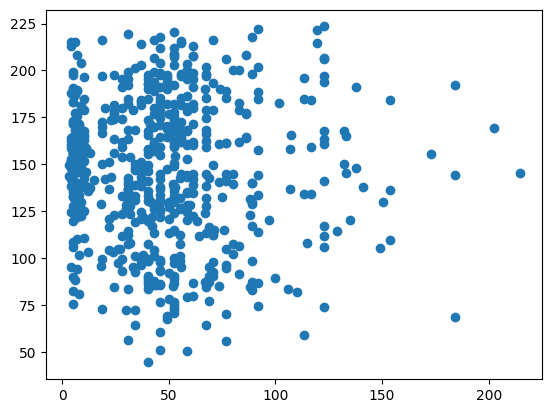

In [142]:
plt.scatter(pmaster['price'], pmaster['brightness'])

In [10]:
pmaster = pmaster.dropna(subset=['average_rgb'])

pmaster['average_rgb'] = pmaster['average_rgb'].apply(lambda x: tuple(x))
reds = []
greens = []
blues = []

for i in range(len(pmaster)):
    reds.append(pmaster.iloc[i]['average_rgb'][0])
    greens.append(pmaster.iloc[i]['average_rgb'][1])
    blues.append(pmaster.iloc[i]['average_rgb'][2])

pmaster['reds'] = reds
pmaster['greens'] = greens
pmaster['blues'] = blues

pmaster.describe()


,price,index,brightness,reds,greens,blues
count,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000
mean,46.613057,73.791401,140.841027,183.133758,137.816879,111.941083
std,35.610163,58.579186,36.814441,38.457184,38.704004,36.421177
min,3.000000,0.000000,43.620000,83.000000,26.000000,18.000000
25%,18.000000,30.000000,116.144400,159.750000,113.000000,85.000000
50%,43.000000,62.000000,142.161000,188.000000,137.000000,111.000000
75%,61.500000,100.250000,166.725800,213.000000,165.000000,139.000000
max,214.500000,254.000000,218.423400,253.000000,219.000000,193.000000


In [16]:
average_hex = rgb_to_hex((183,138,112))
darkest_hex = rgb_to_hex((83, 26, 18))
lightest_hex = rgb_to_hex((253, 219, 193))

show = (average_hex, darkest_hex, lightest_hex)

In [17]:
display(Markdown('<br>'.join(
    f'<span style="font-family: monospace">{color} <span style="color: {color}">████████</span></span>'
    for color in show
)))

<span style="font-family: monospace">#b78a70 <span style="color: #b78a70">████████</span></span><br><span style="font-family: monospace">#531a12 <span style="color: #531a12">████████</span></span><br><span style="font-family: monospace">#fddbc1 <span style="color: #fddbc1">████████</span></span>

In [175]:
pwomen = pwomen.dropna(subset=['average_rgb'])

pwomen['average_rgb'] = pwomen['average_rgb'].apply(lambda x: tuple(x))
reds = []
greens = []
blues = []

for i in range(len(pwomen)):
    reds.append(pwomen.iloc[i]['average_rgb'][0])
    greens.append(pwomen.iloc[i]['average_rgb'][1])
    blues.append(pwomen.iloc[i]['average_rgb'][2])

pwomen['reds'] = reds
pwomen['greens'] = greens
pwomen['blues'] = blues

pwomen.describe()


,price,index,reds,greens,blues
count,378.000000,378.000000,378.000000,378.000000,378.000000
mean,56.907407,86.089947,180.748677,137.201058,110.970899
std,35.299317,67.105700,36.578215,35.458450,33.122259
min,8.000000,0.000000,88.000000,42.000000,26.000000
25%,31.000000,34.000000,157.000000,113.000000,87.250000
50%,46.500000,71.000000,186.000000,142.500000,110.000000
75%,70.875000,121.000000,209.000000,161.750000,134.000000
max,214.500000,254.000000,246.000000,219.000000,181.000000


In [29]:
w_average_hex = rgb_to_hex((201, 157, 131))
w_darkest_hex = rgb_to_hex((88, 42, 26))
w_lightest_hex = rgb_to_hex((246, 219, 181))

show = (w_average_hex, w_darkest_hex, w_lightest_hex)

display(Markdown('<br>'.join(
    f'<span style="font-family: monospace">{color} <span style="color: {color}">████████</span></span>'
    for color in show
)))

<span style="font-family: monospace">#c99d83 <span style="color: #c99d83">████████</span></span><br><span style="font-family: monospace">#582a1a <span style="color: #582a1a">████████</span></span><br><span style="font-family: monospace">#f6dbb5 <span style="color: #f6dbb5">████████</span></span>

In [177]:
pfm = pfm.dropna(subset=['average_rgb'])

pfm['average_rgb'] = pfm['average_rgb'].apply(lambda x: tuple(x))
reds = []
greens = []
blues = []

for i in range(len(pfm)):
    reds.append(pfm.iloc[i]['average_rgb'][0])
    greens.append(pfm.iloc[i]['average_rgb'][1])
    blues.append(pfm.iloc[i]['average_rgb'][2])

pfm['reds'] = reds
pfm['greens'] = greens
pfm['blues'] = blues

pfm.describe()

,price,index,reds,greens,blues
count,131.000000,131.000000,131.000000,131.000000,131.000000
mean,55.564885,65.000000,177.229008,138.290076,111.671756
std,17.359369,37.960506,40.965945,47.809637,42.957124
min,31.000000,0.000000,83.000000,26.000000,18.000000
25%,43.000000,32.500000,151.000000,108.000000,81.000000
50%,52.500000,65.000000,177.000000,131.000000,106.000000
75%,67.500000,97.500000,210.000000,182.000000,153.500000
max,119.500000,130.000000,242.000000,219.000000,185.000000


In [30]:
m_average_hex = rgb_to_hex((197, 158, 132))
m_darkest_hex = rgb_to_hex((83, 26, 18))
m_lightest_hex = rgb_to_hex((242, 219, 185))

show = (m_average_hex, m_darkest_hex, m_lightest_hex)

display(Markdown('<br>'.join(
    f'<span style="font-family: monospace">{color} <span style="color: {color}">████████</span></span>'
    for color in show
)))

<span style="font-family: monospace">#c59e84 <span style="color: #c59e84">████████</span></span><br><span style="font-family: monospace">#531a12 <span style="color: #531a12">████████</span></span><br><span style="font-family: monospace">#f2dbb9 <span style="color: #f2dbb9">████████</span></span>

In [179]:
pkids = pkids.dropna(subset=['average_rgb'])

pkids['average_rgb'] = pkids['average_rgb'].apply(lambda x: tuple(x))
reds = []
greens = []
blues = []

for i in range(len(pkids)):
    reds.append(pkids.iloc[i]['average_rgb'][0])
    greens.append(pkids.iloc[i]['average_rgb'][1])
    blues.append(pkids.iloc[i]['average_rgb'][2])

pkids['reds'] = reds
pkids['greens'] = greens
pkids['blues'] = blues

pkids.describe()

,price,index,reds,greens,blues
count,254.000000,254.000000,254.000000,254.000000,254.000000
mean,24.425197,101.059055,191.094488,141.437008,111.590551
std,30.050720,72.669595,32.489447,33.416671,32.989723
min,3.000000,0.000000,91.000000,48.000000,30.000000
25%,6.000000,42.250000,174.250000,123.000000,91.000000
50%,9.000000,81.500000,193.000000,142.500000,114.000000
75%,34.000000,154.750000,213.000000,160.750000,132.750000
max,150.500000,254.000000,253.000000,218.000000,193.000000


In [31]:
k_average_hex = rgb_to_hex((201, 161, 132))
k_darkest_hex = rgb_to_hex((91, 48, 30))
k_lightest_hex = rgb_to_hex((253, 218, 193))

show = (k_average_hex, k_darkest_hex, k_lightest_hex)

display(Markdown('<br>'.join(
    f'<span style="font-family: monospace">{color} <span style="color: {color}">████████</span></span>'
    for color in show
)))

<span style="font-family: monospace">#c9a184 <span style="color: #c9a184">████████</span></span><br><span style="font-family: monospace">#5b301e <span style="color: #5b301e">████████</span></span><br><span style="font-family: monospace">#fddac1 <span style="color: #fddac1">████████</span></span>

In [181]:
averages = (average_hex, w_average_hex, m_average_hex, k_average_hex)
darkest = (darkest_hex, w_darkest_hex, m_darkest_hex, k_darkest_hex)    
lightest = (lightest_hex, w_lightest_hex, m_lightest_hex, k_lightest_hex)

display(Markdown('<br>'.join(
    f'<span style="font-family: monospace">{color} <span style="color: {color}">████████</span></span>'
    for color in averages
)))

display(Markdown('<br>'.join(
    f'<span style="font-family: monospace">{color} <span style="color: {color}">████████</span></span>'
    for color in darkest
)))

display(Markdown('<br>'.join(
    f'<span style="font-family: monospace">{color} <span style="color: {color}">████████</span></span>'
    for color in lightest
)))

NameError: name 'w_average_hex' is not defined

In [20]:
pmaster.index = pmaster['average_hex']
pmaster.loc['#8b5443']

image          https://www.globaldesi.in/dw/image/v2/BGCX_PRD...
name                             Teal Geometric print  skirt set
price                                                       67.0
index                                                       26.0
average_rgb                                        (139, 84, 67)
average_hex                                              #8b5443
brightness                                               83.2456
reds                                                         139
greens                                                        84
blues                                                         67
Name: #8b5443, dtype: object

In [23]:
pmasterfab = pmasterfab.dropna(subset=['average_rgb'])

pmasterfab['average_rgb'] = pmasterfab['average_rgb'].apply(lambda x: tuple(x))
reds = []
greens = []
blues = []

for i in range(len(pmasterfab)):
    reds.append(pmasterfab.iloc[i]['average_rgb'][0])
    greens.append(pmasterfab.iloc[i]['average_rgb'][1])
    blues.append(pmasterfab.iloc[i]['average_rgb'][2])

pmasterfab['reds'] = reds
pmasterfab['greens'] = greens
pmasterfab['blues'] = blues

pmasterfab.describe()

pmastergd = pmastergd.dropna(subset=['average_rgb'])

pmastergd['average_rgb'] = pmastergd['average_rgb'].apply(lambda x: tuple(x))
reds = []
greens = []
blues = []

for i in range(len(pmastergd)):
    reds.append(pmastergd.iloc[i]['average_rgb'][0])
    greens.append(pmastergd.iloc[i]['average_rgb'][1])
    blues.append(pmastergd.iloc[i]['average_rgb'][2])

pmastergd['reds'] = reds
pmastergd['greens'] = greens
pmastergd['blues'] = blues
pbiba = pbiba.dropna(subset=['average_rgb'])

pbiba['average_rgb'] = pbiba['average_rgb'].apply(lambda x: tuple(x))
reds = []
greens = []
blues = []

for i in range(len(pbiba)):
    reds.append(pbiba.iloc[i]['average_rgb'][0])
    greens.append(pbiba.iloc[i]['average_rgb'][1])
    blues.append(pbiba.iloc[i]['average_rgb'][2])

pbiba['reds'] = reds
pbiba['greens'] = greens
pbiba['blues'] = blues



,price,index,reds,greens,blues
count,96.000000,96.000000,96.000000,96.000000,96.000000
mean,53.447917,37.000000,148.750000,112.260417,90.645833
std,26.678148,25.779633,35.878743,27.780434,23.912991
min,18.000000,0.000000,90.000000,45.000000,39.000000
25%,34.000000,11.750000,114.000000,92.750000,72.000000
50%,46.000000,35.500000,150.000000,111.000000,86.000000
75%,69.000000,59.250000,170.250000,126.750000,102.250000
max,149.000000,83.000000,234.000000,186.000000,164.000000


In [24]:
pmastergd.describe()

,price,index,reds,greens,blues
count,311.000000,311.000000,311.000000,311.000000,311.000000
mean,26.864952,134.170418,187.389068,140.832797,109.974277
std,30.654281,72.491868,25.808596,27.383849,25.799962
min,3.000000,0.000000,94.000000,58.000000,34.000000
25%,6.500000,75.000000,174.000000,125.000000,95.000000
50%,13.000000,132.000000,190.000000,144.000000,111.000000
75%,34.000000,197.500000,204.000000,158.000000,125.000000
max,173.000000,254.000000,252.000000,213.000000,181.000000


In [25]:
pbiba.describe()

,price,index,reds,greens,blues
count,96.000000,96.000000,96.000000,96.000000,96.000000
mean,53.447917,37.000000,148.750000,112.260417,90.645833
std,26.678148,25.779633,35.878743,27.780434,23.912991
min,18.000000,0.000000,90.000000,45.000000,39.000000
25%,34.000000,11.750000,114.000000,92.750000,72.000000
50%,46.000000,35.500000,150.000000,111.000000,86.000000
75%,69.000000,59.250000,170.250000,126.750000,102.250000
max,149.000000,83.000000,234.000000,186.000000,164.000000


In [28]:
f_average_hex = rgb_to_hex((210, 164, 138))
gd_average_hex = rgb_to_hex((207, 161, 130))
biba_average_hex = rgb_to_hex((169, 132, 111))

show = (f_average_hex, gd_average_hex, biba_average_hex)

display(Markdown('<br>'.join(
    f'<span style="font-family: monospace">{color} <span style="color: {color}">████████</span></span>'
    for color in show
)))

<span style="font-family: monospace">#d2a48a <span style="color: #d2a48a">████████</span></span><br><span style="font-family: monospace">#cfa182 <span style="color: #cfa182">████████</span></span><br><span style="font-family: monospace">#a9846f <span style="color: #a9846f">████████</span></span>